Lasso Selected Features (Non-zero coefficients):
petal length (cm)    0.304309
petal width (cm)     0.378882
dtype: float64
Lasso Model performance (R^2 score): 0.9356732855719233

Feature Importances by Random Forest:
             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


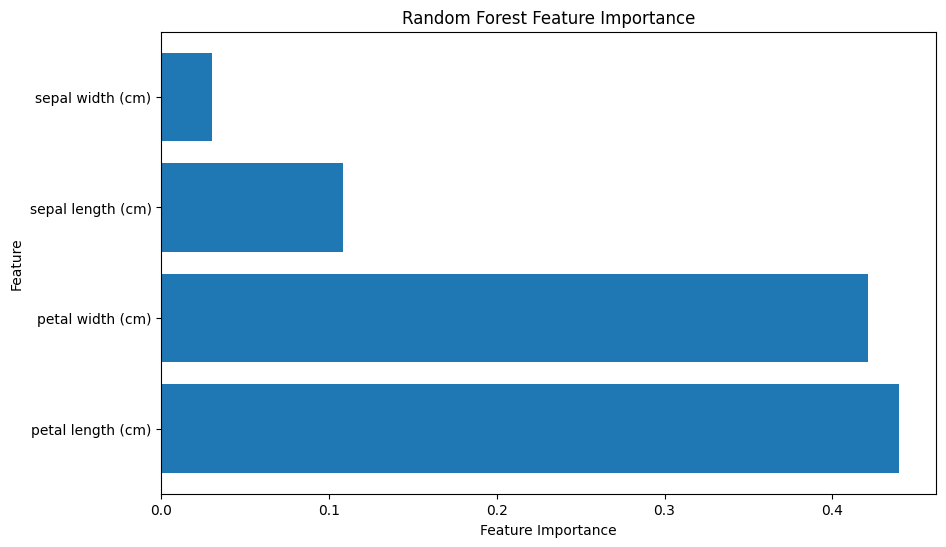


ElasticNet Selected Features (Non-zero coefficients):
sepal width (cm)    -0.028093
petal length (cm)    0.326326
petal width (cm)     0.378389
dtype: float64
ElasticNet Model performance (R^2 score): 0.9404633314270668


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Get Lasso coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
selected_features_lasso = lasso_coefficients[lasso_coefficients != 0]
print("Lasso Selected Features (Non-zero coefficients):")
print(selected_features_lasso)

# Evaluate Lasso performance
lasso_score = lasso.score(X_test_scaled, y_test)
print(f"Lasso Model performance (R^2 score): {lasso_score}")

# 2. Random Forest Classifier (Feature Importance)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances from Random Forest
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances by Random Forest:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# 3. ElasticNet Regression (L1 and L2 Regularization)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio=0.5 means equal mix of L1 and L2
elasticnet.fit(X_train_scaled, y_train)

# Get ElasticNet coefficients
elasticnet_coefficients = pd.Series(elasticnet.coef_, index=X.columns)
selected_features_en = elasticnet_coefficients[elasticnet_coefficients != 0]
print("\nElasticNet Selected Features (Non-zero coefficients):")
print(selected_features_en)

# Evaluate ElasticNet performance
elasticnet_score = elasticnet.score(X_test_scaled, y_test)
print(f"ElasticNet Model performance (R^2 score): {elasticnet_score}")
